In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lex-fridman-podcast-transcript/podcastdata_dataset.csv


In [16]:
import pandas as pd

In [17]:
ruta="/kaggle/input/lex-fridman-podcast-transcript/podcastdata_dataset.csv"
df=pd.read_csv(ruta)
df

,id,guest,title,text
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...
...,...,...,...,...
314,321,Ray Kurzweil,"Singularity, Superintelligence, and Immortality","By the time he gets to 2045, we'll be able to ..."
315,322,Rana el Kaliouby,"Emotion AI, Social Robots, and Self-Driving Cars","there's a broader question here, right? As we ..."
316,323,Will Sasso,"Comedy, MADtv, AI, Friendship, Madness, and Pr...",Once this whole thing falls apart and we are c...
317,324,Daniel Negreanu,Poker,you could be the seventh best player in the wh...


In [18]:
texto=df[df["id"]==1]['text'].values[0]
len(texto.split())

13424

In [19]:
# Crear las nuevas columnas para el conteo de palabras y oraciones
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))  # Contar palabras
df['sentence_count'] = df['text'].apply(lambda x: len([s for s in str(x).split('.') if s.strip()]))  # Contar oraciones usando '.'

In [20]:
df

,id,guest,title,text,word_count,sentence_count
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera...",13424,610
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...,10217,496
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang...",5989,289
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...,5993,308
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...,6374,483
...,...,...,...,...,...,...
314,321,Ray Kurzweil,"Singularity, Superintelligence, and Immortality","By the time he gets to 2045, we'll be able to ...",12807,851
315,322,Rana el Kaliouby,"Emotion AI, Social Robots, and Self-Driving Cars","there's a broader question here, right? As we ...",26034,1676
316,323,Will Sasso,"Comedy, MADtv, AI, Friendship, Madness, and Pr...",Once this whole thing falls apart and we are c...,25255,1778
317,324,Daniel Negreanu,Poker,you could be the seventh best player in the wh...,29911,1649


In [21]:
# Toma un texto como entrada y lo divide en fragmentos separados por puntos (.)
def punt(texto):
    return texto.split(".") 

In [22]:
df['punt']=df["text"].apply(punt)
df

,id,guest,title,text,word_count,sentence_count,punt
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera...",13424,610,"[As part of MIT course 6S099, Artificial Gener..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...,10217,496,[As part of MIT course 6S099 on artificial gen...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang...",5989,289,"[You've studied the human mind, cognition, lan..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...,5993,308,[What difference between biological neural net...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...,6374,483,[The following is a conversation with Vladimir...
...,...,...,...,...,...,...,...
314,321,Ray Kurzweil,"Singularity, Superintelligence, and Immortality","By the time he gets to 2045, we'll be able to ...",12807,851,"[By the time he gets to 2045, we'll be able to..."
315,322,Rana el Kaliouby,"Emotion AI, Social Robots, and Self-Driving Cars","there's a broader question here, right? As we ...",26034,1676,"[there's a broader question here, right? As we..."
316,323,Will Sasso,"Comedy, MADtv, AI, Friendship, Madness, and Pr...",Once this whole thing falls apart and we are c...,25255,1778,[Once this whole thing falls apart and we are ...
317,324,Daniel Negreanu,Poker,you could be the seventh best player in the wh...,29911,1649,[you could be the seventh best player in the w...


In [23]:
# Función para generar un nuevo DataFrame con las separaciones
def crear_dataframe_separado(dataframe):
    separaciones = []
    for index, fila in dataframe.iterrows():
        oraciones = fila['punt']
        for indice_oracion, oracion in enumerate(oraciones, 1):
            separaciones.append({
                'id_podcast': fila['id'],       # Identificador original del podcast
                'id_oracion': indice_oracion,   # Identificador de la oración separada
                'contenido': oracion            # Contenido de la oración
            })
    return pd.DataFrame(separaciones)

In [24]:
# Crear el DataFrame con las separaciones
df_oraciones = crear_dataframe_separado(df)

In [25]:
# Mostrar el resultado
df_oraciones

,id_podcast,id_oracion,contenido
0,1,1,"As part of MIT course 6S099, Artificial Genera..."
1,1,2,He is a professor here at MIT
2,1,3,"He's a physicist, spent a large part of his c..."
3,1,4,But he's also studied and delved into the ben...
4,1,5,"Amongst many other things, he is the cofounde..."
...,...,...,...
390878,325,1727,It's the beginning
390879,325,1728,"It's not the whole story by any means, but it..."
390880,325,1729,Where's state stored of the system? Is it in ...
390881,325,1730,So there are chemical networks


In [26]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [27]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [28]:
# Descargar datos necesarios para tokenización de NLTK
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [29]:
# 1. Tokenización: Dividir las oraciones en listas de palabras
df_oraciones['palabras'] = df_oraciones['contenido'].apply(lambda texto: word_tokenize(texto.lower()))

# 2. Entrenamiento de Word2Vec
# Preparar datos para el entrenamiento del modelo Word2Vec
corpus_tokens = df_oraciones['palabras'].tolist()

# Entrenar el modelo Word2Vec con los parámetros ajustados
modelo_word2vec = Word2Vec(sentences=corpus_tokens, vector_size=100, window=5, min_count=1, workers=4)

# 3. Calcular embeddings para cada oración
# Función para obtener el promedio de vectores para las palabras de cada oración
def calcular_vector_promedio(lista_palabras, modelo):
    vectores = [modelo.wv[palabra] for palabra in lista_palabras if palabra in modelo.wv]
    if len(vectores) > 0:
        return sum(vectores) / len(vectores)  # Promediar los vectores
    else:
        return [0.0] * modelo.vector_size  # Retornar ceros si no hay palabras en el vocabulario

In [30]:
# Aplicar la función para calcular los embeddings a cada fila del DataFrame
df_oraciones['vector_embedding'] = df_oraciones['palabras'].apply(lambda palabras: calcular_vector_promedio(palabras, modelo_word2vec))

In [31]:
# Mostrar el DataFrame con los embeddings añadidos
df_oraciones

,id_podcast,id_oracion,contenido,palabras,vector_embedding
0,1,1,"As part of MIT course 6S099, Artificial Genera...","[as, part, of, mit, course, 6s099, ,, artifici...","[-0.27549225, 0.028025521, 0.24007116, -0.0143..."
1,1,2,He is a professor here at MIT,"[he, is, a, professor, here, at, mit]","[0.48287556, 0.80554754, -0.3300042, 0.4028043..."
2,1,3,"He's a physicist, spent a large part of his c...","[he, 's, a, physicist, ,, spent, a, large, par...","[-0.76920986, 0.19778886, -0.07146388, 0.14395..."
3,1,4,But he's also studied and delved into the ben...,"[but, he, 's, also, studied, and, delved, into...","[-0.38229766, -0.8565993, 0.31866744, -0.34147..."
4,1,5,"Amongst many other things, he is the cofounde...","[amongst, many, other, things, ,, he, is, the,...","[-0.4256983, -0.10846254, -0.21150729, -0.0260..."
...,...,...,...,...,...
390878,325,1727,It's the beginning,"[it, 's, the, beginning]","[-0.2139602, -0.16638887, 0.98445773, -0.79227..."
390879,325,1728,"It's not the whole story by any means, but it...","[it, 's, not, the, whole, story, by, any, mean...","[-0.31990126, -0.90480083, 0.5172502, -0.01487..."
390880,325,1729,Where's state stored of the system? Is it in ...,"[where, 's, state, stored, of, the, system, ?,...","[-0.3272447, 0.020106874, 0.6197109, -0.175023..."
390881,325,1730,So there are chemical networks,"[so, there, are, chemical, networks]","[-0.02641573, 0.06838204, 0.4838058, 0.5847313..."


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [33]:
# Función para calcular el embedding de una consulta
def obtener_vector_query(consulta, modelo):
    palabras = word_tokenize(consulta.lower())
    vectores = [modelo.wv[palabra] for palabra in palabras if palabra in modelo.wv]
    if vectores:
        return np.mean(vectores, axis=0)  # Promediar los vectores
    else:
        return np.zeros(modelo.vector_size)  # Retornar vector de ceros si no hay coincidencias

In [34]:
# Consulta a procesar
consulta_usuario = "Gene regulatory networks"

# Obtener el embedding de la consulta
vector_consulta = obtener_vector_query(consulta_usuario, modelo_word2vec)

In [35]:
# Calcular similitudes entre la consulta y los embeddings del DataFrame
def calcular_similitudes(vector_consulta, lista_vectores):
    matriz_vectores = np.array(lista_vectores)
    return cosine_similarity([vector_consulta], matriz_vectores)[0]

In [36]:
# Convertir los embeddings del DataFrame a una lista
lista_vectores_emb = df_oraciones['vector_embedding'].tolist()

# Calcular las similitudes
valores_similitud = calcular_similitudes(vector_consulta, lista_vectores_emb)

# Encontrar la oración más similar
indice_similar = np.argmax(valores_similitud)
oracion_similar = df_oraciones.iloc[indice_similar]

In [37]:
# Mostrar resultados
print("Consulta:", consulta_usuario)
print("Oración más similar:", oracion_similar['contenido'])
print("ID del podcast:", oracion_similar['id_podcast'])
print("ID de la oración:", oracion_similar['id_oracion'])

Consulta: Gene regulatory networks
Oración más similar:  AKA neural networks
ID del podcast: 103
ID de la oración: 195


In [38]:
df_oraciones[df_oraciones["id_podcast"]==103]["contenido"]

69540    The following is a conversation with Ben Goert...
69541     He's the founder of SingularityNet, designer ...
69542     He has been a central figure in the AGI commu...
69543                                It's virtual and free
69544     I encourage you to check out the talks, inclu...
                               ...                        
71431     I had nothing against logic as the cognitive ...
71432     I mean, you can use logic if you want, but so...
71433                                                     
71434                                                     
71435                                                     
Name: contenido, Length: 1896, dtype: object

### Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
# Asegúrate de que los embeddings estén en formato numpy array
vector_embeddings = np.array(df_oraciones['vector_embedding'].tolist())

# Definir la cantidad de clusters que deseas
num_clusters = 10

# Aplicar el algoritmo de K-Means
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
df_oraciones['cluster'] = kmeans_model.fit_predict(vector_embeddings)

# Opcional: Reducir la dimensionalidad con PCA para poder visualizar los clusters
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(vector_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


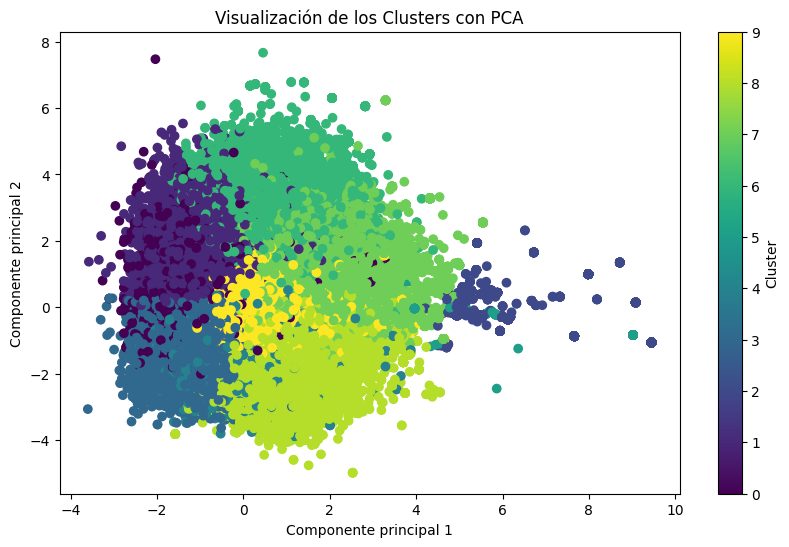

In [41]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df_oraciones['cluster'], cmap='viridis', marker='o')
plt.title("Visualización de los Clusters con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()

In [42]:
df_oraciones

,id_podcast,id_oracion,contenido,palabras,vector_embedding,cluster
0,1,1,"As part of MIT course 6S099, Artificial Genera...","[as, part, of, mit, course, 6s099, ,, artifici...","[-0.27549225, 0.028025521, 0.24007116, -0.0143...",4
1,1,2,He is a professor here at MIT,"[he, is, a, professor, here, at, mit]","[0.48287556, 0.80554754, -0.3300042, 0.4028043...",4
2,1,3,"He's a physicist, spent a large part of his c...","[he, 's, a, physicist, ,, spent, a, large, par...","[-0.76920986, 0.19778886, -0.07146388, 0.14395...",3
3,1,4,But he's also studied and delved into the ben...,"[but, he, 's, also, studied, and, delved, into...","[-0.38229766, -0.8565993, 0.31866744, -0.34147...",3
4,1,5,"Amongst many other things, he is the cofounde...","[amongst, many, other, things, ,, he, is, the,...","[-0.4256983, -0.10846254, -0.21150729, -0.0260...",3
...,...,...,...,...,...,...
390878,325,1727,It's the beginning,"[it, 's, the, beginning]","[-0.2139602, -0.16638887, 0.98445773, -0.79227...",8
390879,325,1728,"It's not the whole story by any means, but it...","[it, 's, not, the, whole, story, by, any, mean...","[-0.31990126, -0.90480083, 0.5172502, -0.01487...",8
390880,325,1729,Where's state stored of the system? Is it in ...,"[where, 's, state, stored, of, the, system, ?,...","[-0.3272447, 0.020106874, 0.6197109, -0.175023...",3
390881,325,1730,So there are chemical networks,"[so, there, are, chemical, networks]","[-0.02641573, 0.06838204, 0.4838058, 0.5847313...",0


### Obtener la oración más significativa de cada tópico

In [43]:
# Obtener los centroides de cada grupo
centroides_clusters = kmeans_model.cluster_centers_

# Función para calcular la similitud coseno entre un embedding y el centroide del grupo
def calcular_similitud_con_centroide(embedding, centroide):
    return cosine_similarity([embedding], [centroide])[0][0]

In [44]:
# Diccionario para almacenar las oraciones más representativas de cada grupo
oraciones_representativas = {}

# Iterar sobre cada grupo para encontrar las oraciones más cercanas al centroide
for id_grupo in range(num_clusters):
    # Obtener las oraciones que pertenecen a este grupo
    oraciones_del_grupo = df_oraciones[df_oraciones['cluster'] == id_grupo]
    
    # Obtener los embeddings de las oraciones de este grupo
    embeddings_del_grupo = np.array(oraciones_del_grupo['vector_embedding'].tolist())
    
    # Calcular la similitud coseno entre cada embedding y el centroide del grupo
    similitudes_grupo = [calcular_similitud_con_centroide(embedding, centroides_clusters[id_grupo]) for embedding in embeddings_del_grupo]
    
    # Encontrar el índice de la oración más cercana al centroide
    indice_oracion_representativa = np.argmax(similitudes_grupo)
    
    # Obtener la oración más representativa del grupo
    oracion_representativa_grupo = oraciones_del_grupo.iloc[indice_oracion_representativa]['contenido']
    
    # Guardar la oración más representativa en el diccionario
    oraciones_representativas[id_grupo] = oracion_representativa_grupo

In [45]:
# Imprimir las oraciones más representativas de ca tópico
for id_grupo, oracion in oraciones_representativas.items():
    print(f"Grupo {id_grupo}: {oracion}")

Grupo 0:  Most companies fail because they sit there and they don't, either they're learning rates too slow, they sit there and they're just, they're adamant that they're right, even though the data is telling them they're not right, or they're learning rates too high and they wildly chase different ideas and they never actually settle on one where they don't groove, right? And I think when we sat down and we wrote out those three ideas, what we were saying is, what are the three possible, whether they're local or global maxima in our world, right? That users are telling us they like because they're using the product that way
Grupo 1:  I think that there is a great deal to be gained from having the ability to remember things, but then when you forget them, you can then have a, you can basically do the simulation again and work out if you get to that compressed representation
Grupo 2:  Yeah
Grupo 3:  It's the sort of thing that's definitely been economically modeled a lot like one of th

### Búsqueda por tópico

In [52]:
# Función para obtener el embedding de la búsqueda
def obtener_embedding_busqueda(clave, modelo):
    tokens = clave.split()
    vectores = [modelo.wv[word] for word in tokens if word in modelo.wv]
    if len(vectores) > 0:
        return np.mean(vectores, axis=0)
    else:
        return np.zeros(modelo.vector_size)

# Función para realizar la búsqueda
def buscar_por_topico(clave, modelo, df_oraciones, top_n=5):
    # Obtener el embedding de las palabras clave
    embedding_busqueda = obtener_embedding_busqueda(clave, modelo)
    
    # Calcular la similitud coseno entre el embedding de búsqueda y los embeddings de las oraciones
    embeddings_oraciones = np.array(df_oraciones['vector_embedding'].tolist())
    similitudes = cosine_similarity([embedding_busqueda], embeddings_oraciones)[0]
    
    # Ordenar las oraciones por similitud
    df_oraciones['similitud'] = similitudes
    resultados = df_oraciones.sort_values(by='similitud', ascending=False).head(top_n)
    
    return resultados

In [53]:
# Realizar la búsqueda
clave_busqueda = "Systems biology"
resultados_busqueda = buscar_por_topico(clave_busqueda, modelo_word2vec, df_oraciones)

# Buscar los títulos correspondientes a los ids encontrados en el CSV
def obtener_titulo_por_id(ids, df):
    # Filtrar el DataFrame para obtener solo las filas con los ids correspondientes
    titulos = df[df['id_podcast'].isin(ids)][['id_podcast', 'title']]
    return titulos

# Obtener los ids de los resultados de búsqueda
ids_resultados = resultados_busqueda['id_podcast'].tolist()

# Obtener los títulos correspondientes a esos ids (aquí usamos 'contenido' en lugar de 'title')
titulos_correspondientes = df_oraciones[df_oraciones['id_podcast'].isin(ids_resultados)][['id_podcast', 'contenido']]

# Mostrar los resultados de búsqueda junto con los títulos
resultados_busqueda = resultados_busqueda.merge(titulos_correspondientes, on='id_podcast', how='left')

# Renombrar las columnas para evitar conflictos
resultados_busqueda.rename(columns={'contenido_x': 'contenido'}, inplace=True)

# Mostrar los resultados
print(resultados_busqueda[['id_podcast', 'contenido', 'similitud']])

      id_podcast                                   contenido  similitud
0             85                             Biology centric   0.947273
1             85                             Biology centric   0.947273
2             85                             Biology centric   0.947273
3             85                             Biology centric   0.947273
4             85                             Biology centric   0.947273
...          ...                                         ...        ...
6789          94   The geometric mean of biology and physics   0.751895
6790          94   The geometric mean of biology and physics   0.751895
6791          94   The geometric mean of biology and physics   0.751895
6792          94   The geometric mean of biology and physics   0.751895
6793          94   The geometric mean of biology and physics   0.751895

[6794 rows x 3 columns]
